# <strong> FIN620: PROJECT 4
 - Jasneek Singh Chugh
 - jc2433

# *Stock Trading using Bollinger Bands*

## Introduction

Quantitative traders often look for trading tools that can spot trends or reversals. Such tools should self-adapt to market conditions and try to describe the current situation in the most accurate way.

Bollinger Bands can be applied in all the financial markets including equities, commodities, forex, and futures. Bollinger Bands can be used in most time frames, from very short-term periods, to hourly, daily, weekly or monthly. Since their introduction 30 years ago they have become one of the most widely used technical indicators worldwide.



## What are Bollinger Bands?

Bollinger Bands encapsulate the price movement of a stock. It provides relative boundaries of highs and lows. The crux of the Bollinger Band indicator is based on a moving average that defines the intermediate-term "trend" based on the time frame you are viewing.

This trend indicator is known as the middle band. Most stock charting applications use a 20-period moving average for the default Bollinger Bands settings. The upper and lower bands are then a measure of volatility to the upside and downside. They are calculated as two standard deviations from the middle band.

- The middle band, which is a N-period simple moving average. The standard setting is a 20-day  SMA. Other moving averages, like the exponential moving average, is also used by some traders.
- Upper band: a 20-period Simple Moving Average plus 2 times the 20-period rolling standard deviation, both calculated on the close price
- Lower band: a 20-period Simple Moving Average minus 2 times the 20-period rolling standard deviation, both calculated on the close price

## How it works?

Bollinger Bands are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify M-Tops and W-Bottoms or to determine the strength of the trend. When the markets become more volatile, the bands widen; during less volatile periods, the bands contract.

In [35]:
# import necessary libraries 
%matplotlib inline
import numpy as np 
import pandas as pd
import datetime
import warnings
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [48]:
start = datetime.datetime(2019, 4, 28)
end = datetime.datetime(2021, 4, 28)


stock_df = web.DataReader(['AMZN'], 'yahoo', start = start, end = end)['Close']
stock_df.columns = {'Close_Price'}
stock_df.tail()

,Close_Price
Date,
2021-04-22,3309.040039
2021-04-23,3340.879883
2021-04-26,3409.000000
2021-04-27,3417.429932
2021-04-28,3458.500000


In [49]:
stock_df.shape

(505, 1)

In [50]:
stock_df.isnull().sum()

Close_Price    0
dtype: int64

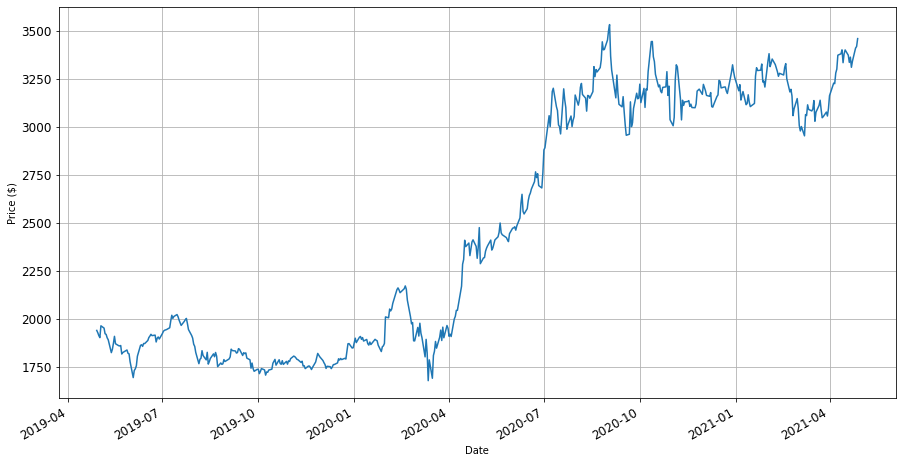

In [52]:
stock_df['Close_Price'].plot(figsize = (15, 8), fontsize = 12)
plt.ylabel('Price ($)')
plt.grid()
plt.show()

As it can be seen, there is a steep dip in the price of the stock around the month of April 2020. That is due to the meltdown in the global financial markets at the peak of Covid-19 Crises. But, after that you can see that there is gradual increase in the stock prices because the demand of Amazon e-commerce rose and people were ordering daily from amazon during the pandemic.

In [53]:
# compute the datapoints for moving average, upper band and the lower band

def bollinger_band(price, length = 20, num_stdev = 2):
    mean_price = price.rolling(length).mean()
    stdev = price.rolling(length).std()
    upband = mean_price + num_stdev*stdev
    dwnband = mean_price - num_stdev*stdev
    
    return np.round(mean_price, 3), np.round(upband, 3), np.round(dwnband, 3)

stock_df['Moving_avg'], stock_df['Upper_band'], stock_df['Lower_band'] = bollinger_band(stock_df['Close_Price'])

In [54]:
stock_df.tail()

,Close_Price,Moving_avg,Upper_band,Lower_band
Date,,,,
2021-04-22,3309.040039,3257.726,3518.371,2997.080
2021-04-23,3340.879883,3272.456,3515.487,3029.426
2021-04-26,3409.000000,3290.305,3517.062,3063.548
2021-04-27,3417.429932,3307.390,3516.910,3097.870
2021-04-28,3458.500000,3327.550,3510.894,3144.207


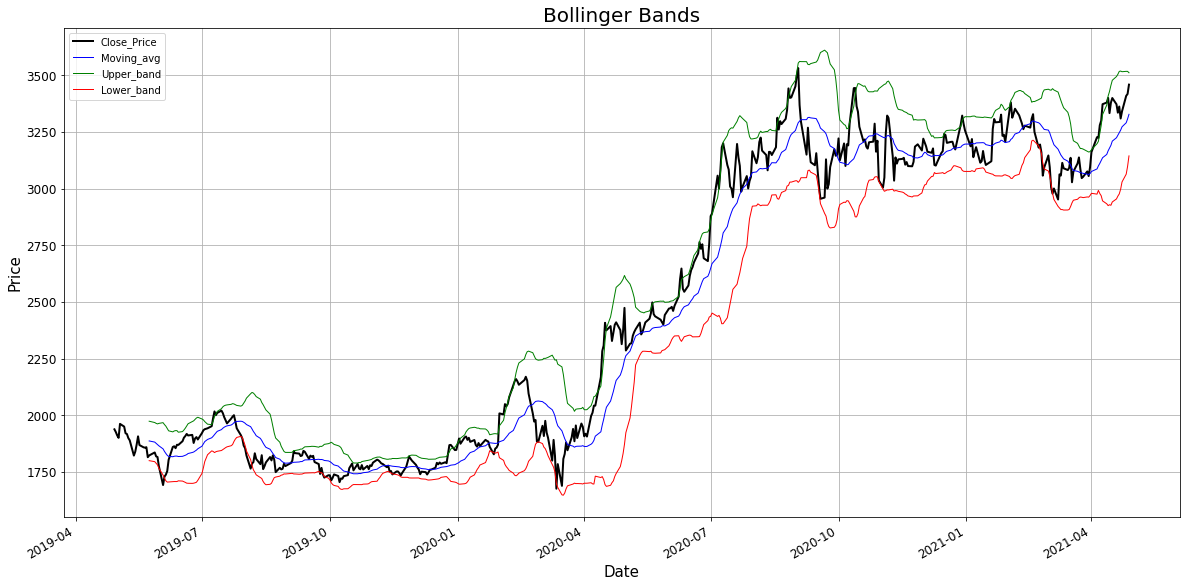

In [55]:
# plotting and visualization of bollinger bands

stock_df['Close_Price'].plot(c = 'k', figsize = (20,10), lw = 2, fontsize = 12)
stock_df['Moving_avg'].plot(c = 'b', figsize = (20, 10), lw = 1)
stock_df['Upper_band'].plot(c = 'g', figsize = (20, 10), lw = 1) 
stock_df['Lower_band'].plot(c = 'r', figsize = (20, 10), lw = 1)

# show plot
plt.title('Bollinger Bands', fontsize = 20)
plt.ylabel('Price',fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend()
plt.grid()
plt.show()

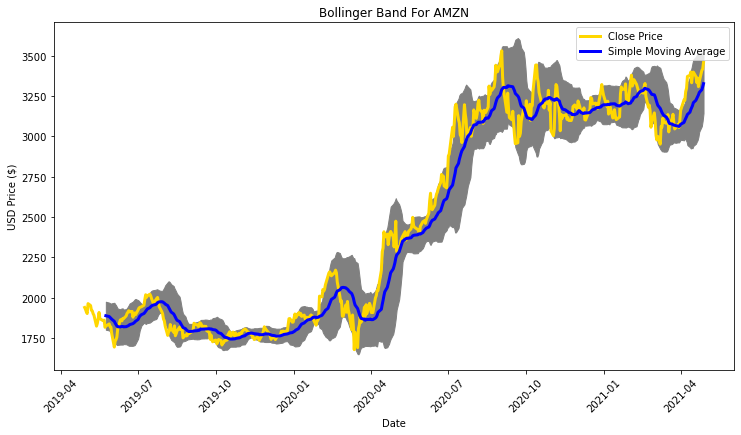

In [103]:
fig = plt.figure(figsize=(12.2,6.4)) 

ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
x_axis = stock_df.index
ax.fill_between(x_axis, stock_df['Upper_band'], stock_df['Lower_band'], color='grey')

# Plotting the Closing Price and Moving Average
ax.plot(x_axis, stock_df['Close_Price'], color='gold', lw=3, label = 'Close Price') #lw = line width
ax.plot(x_axis, stock_df['Moving_avg'], color='blue', lw=3, label = 'Simple Moving Average')

ax.set_title('Bollinger Band For AMZN')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();

The grey area shows the full squeeze effect of upper and lower bands. The adjusted closing prices and its 20 trading days moving average can be seen and read better.

In [93]:
period=20
#Creating a new data frame
df_stock = stock_df[period-1:]

df_stock

,Close_Price,Moving_avg,Upper_band,Lower_band
Date,,,,
2019-05-24,1823.280029,1887.219,1974.176,1800.261
2019-05-28,1836.430054,1882.119,1968.392,1795.845
2019-05-29,1819.189941,1876.752,1964.732,1788.772
2019-05-30,1816.319946,1871.992,1962.321,1781.663
2019-05-31,1775.069946,1865.704,1964.677,1766.732
...,...,...,...,...
2021-04-22,3309.040039,3257.726,3518.371,2997.080
2021-04-23,3340.879883,3272.456,3515.487,3029.426
2021-04-26,3409.000000,3290.305,3517.062,3063.548


In [90]:
#Functions to get buy and sell signals
def get_signal(data):
    buy_signal = [] #buy list
    sell_signal = [] #sell list
    
    for i in range(len(data['Close_Price'])):
        if data['Close_Price'][i] > data['Upper_band'][i]: #Then you should sell 
          #print('SELL')
            buy_signal.append(np.nan)
            sell_signal.append(data['Close_Price'][i])
        elif data['Close_Price'][i] < data['Lower_band'][i]: #Then you should buy
          #print('BUY')
              sell_signal.append(np.nan)
              buy_signal.append(data['Close_Price'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [94]:
get_signal(df_stock)

([nan,
  nan,
  nan,
  nan,
  nan,
  1692.68994140625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1898.530029296875,
  1866.780029296875,
  1855.3199462890625,
  1823.239990234375,
  1765.1300048828125,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1741.6099853515625,
  nan,
  1739.8399658203125,
  1725.449951171875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1739.4899902343

In [95]:
#Create new columns for the buy and sell signals
df_stock['Buy'] =  get_signal(df_stock)[0]
df_stock['Sell'] =  get_signal(df_stock)[1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


If Close Price > Upper Band - Then Sell

If Close Price < Lower Band - Then Buy

In [96]:
df_stock.head()

,Close_Price,Moving_avg,Upper_band,Lower_band,Buy,Sell
Date,,,,,,
2019-05-24,1823.280029,1887.219,1974.176,1800.261,NaN,NaN
2019-05-28,1836.430054,1882.119,1968.392,1795.845,NaN,NaN
2019-05-29,1819.189941,1876.752,1964.732,1788.772,NaN,NaN
2019-05-30,1816.319946,1871.992,1962.321,1781.663,NaN,NaN
2019-05-31,1775.069946,1865.704,1964.677,1766.732,NaN,NaN


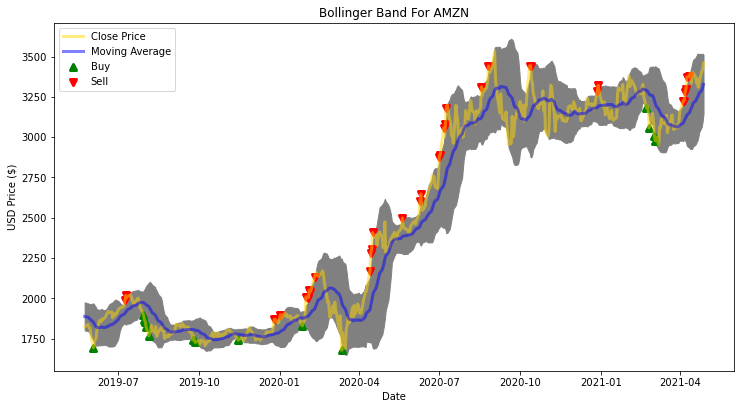

In [106]:
fig = plt.figure(figsize=(12.2,6.4)) 

ax = fig.add_subplot(1,1,1) 
x_axis = df_stock.index
ax.fill_between(x_axis, df_stock['Upper_band'], df_stock['Lower_band'], color='grey')

# Plotting the Closing Price and Moving Average
ax.plot(x_axis, df_stock['Close_Price'], color='gold', lw=3, label = 'Close Price',alpha = 0.5)
ax.plot(x_axis, df_stock['Moving_avg'], color='blue', lw=3, label = 'Moving Average',alpha = 0.5)
ax.scatter(x_axis, df_stock['Buy'] , color='green', lw=3, label = 'Buy',marker = '^', alpha = 1)
ax.scatter(x_axis, df_stock['Sell'] , color='red', lw=3, label = 'Sell',marker = 'v', alpha = 1)

ax.set_title('Bollinger Band For AMZN')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
ax.legend()
plt.show();

## Conclusion

One strategy effective for the relatively low-risk individual who is content with low but safe returns on their investment is to trade by keeping an eye on the SMA as the signal to enter or exit the trade. If the closing price crosses SMA from below, it is an indication to go long.

Bollinger Bands are an effective tool in the trader’s arsenal if used the proper way. The upper and lower bands show the volatility of the price, because they are based on standard deviation calculations. About 90% of all price-action takes place inside the bands, and any breakout outside the bands is a major event.

Bollinger Bands are also not a standalone trading strategy, and should be combined with other technical indicators which rely on a different set of data, like price patterns and trendlines. Different strategies using such a dynamic tool can lead to different results, so a good backtest of a trading strategy should always be done to fine-tune the parameters of the indicators

## References:

- https://www.investopedia.com/terms/b/bollingerbands.asp
- https://medium.datadriveninvestor.com/how-to-implement-bollinger-bands-in-python-1106b90da8d1
- https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300